# Detect Spam Messages - Natural Languague Processing

In [1]:
__author__ = "Chris Tran"
__email__ = "tranduckhanh96@gmail.com"
__website__ = "chriskhanhtran.github.io"

# Part 1 - Introduction

In order to predict whether a message is spam, first I vectorized text messages into a form that machine learning algorithms can understand. Next I train a machine learning model to learn to discriminate between normal and spam messages. Finally, with the trained model, I will classify unlabel messages into normal or spam.

I have taken a great Machine Learning course by Jose Portilla on Udemy and now I want to apply what I have learnt so far in Natural Language Processing to analyze this sms dataset.

### Dataset Informatiom

The [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection) is obtained from UCI Machine Learning Repository. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

# Part 2 - Discover

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

## Load the Data

In [3]:
sms = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

Let's explore the data:

In [4]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


The data has a total of 5572 messages.

In [5]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

The target variable is either ham or spam. There are 4825 ham messages and 747 spam messages.

Text(0.5, 1.0, 'Count Plot')

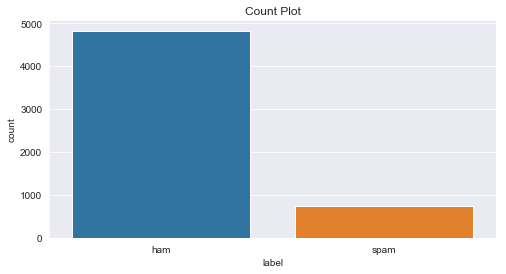

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=sms)

plt.title('Count Plot')

#### Length of messages
Let's explore the length of messages:

In [7]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


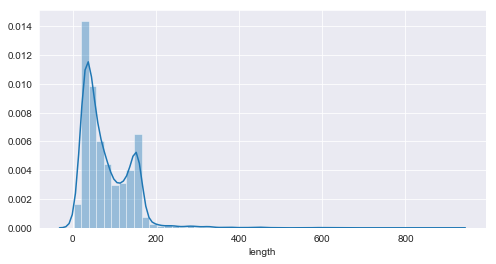

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(sms[('length')])

The data seems to have some outliers with more than 800 characters. I will use a box plot to discover these outliers.

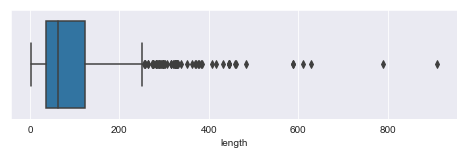

In [9]:
plt.figure(figsize=(8,2))
sns.boxplot(sms[('length')])

There seem to be 3 messages with about 600 characters, 1 with 800 characters and 1 with 900 characters. What are they?

In [10]:
sms[sms['length'] > 500]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2434,ham,Indians r poor but India is not a poor country...,629
2849,ham,Sad story of a Man - Last week was my b'day. M...,588


In [11]:
for text in sms[sms['length'] > 550]['message']:
    print(text, "\n\n")                

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.. 


How to Make a girl Happy? It's not at all difficult to make girls happy. U only need t

There are some interesting stories going on here, but let's go back to analyzing our data. How are ham and spam messages different in length?

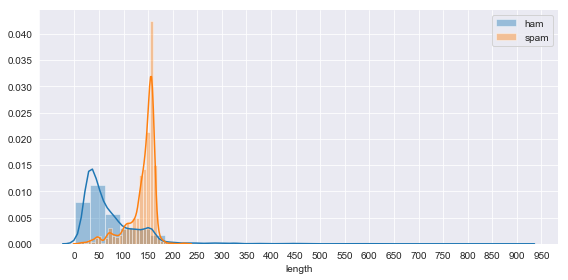

In [12]:
g = sns.FacetGrid(data=sms, hue="label", height=4, aspect=2)
g.map(sns.distplot, 'length', bins=30)
g.set(xticks=np.arange(0,1000,50))
plt.legend()

The average length of ham messages is about 40 characters while that of spam messages is 160. It is a big difference, so length could be a good feature to classify message labels.

# Part 3 - Create Model

## Text Pre-processing

Before vectorizing the messages, I will clean them to get the words I actually want by removing punctuation and stop words (i.e. "the", "a", "to"...). This process is called tokenization. I will need to use the NLTK library to do this step. 

In [13]:
import string
import nltk
from nltk.corpus import stopwords
# nltk.download_shell() #download stopwords

In [14]:
def text_preprocess(text):
    """
    1. Remove punctuation in the text
    2. Remove stop words in the text
    3. Return a list of words in the text
    """
    remove_punctuation = "".join([c for c in text if c not in string.punctuation])
    remove_stopwords = [word for word in remove_punctuation.split() if word not in stopwords.words('english')]
    
    return remove_stopwords

In [15]:
sms['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [16]:
# Let's check the function
sms['message'].head(5).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

## Create Model

In this step I will create a pipeline, in which:
- first, I use **CountVectorizer** convert text messages into a matrix of token counts, where one dimension is all the words in the data, and the other is all the messages,
- then, I calculate **term frequency-inverse document frequency (TF-IDF)**, which measures the importance of each word to each message in the whole data,
- finally, I use Naive Bayes classifier model to train and predict the data.

But first, let's split the data into train and test data.

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = sms['message']
y= sms['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Create pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorize', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('NBclassifier', MultinomialNB())
])

### Train the model

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorize',
                 CountVectorizer(analyzer=<function text_preprocess at 0x000002BEB44C6558>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('NBclassifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=F

In [20]:
y_pred = pipeline.predict(X_test)

## Evaluate the model

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"""
Confusion Matrix:
{confusion_matrix(y_test, y_pred)}

Classification Report:
{classification_report(y_test, y_pred)}
""")


Confusion Matrix:
[[1593    0]
 [  66  180]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.73      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839




There are 66 messages that the model fails to predict as spam in the total of 246 spam messages in the dataset. It does not misclassify any normal messages as spam. The overall accuracy rate is 96%.

# Part 4 - Conclusion

Before using machine learning techniques to identify spam messages, I cleaned the dataset of 5572 messages obtained from UCI Machine Learning Repository by removing punctuation and stop words in each message. Then I created a pipeline that vectorized the text messages, calculated TF-IDF of each vector, and train the data with Naive Bayes algorithm. The model obtains the accuracy rate of 96% overall.

There are a lot of approaches to process, tokenize and train text data. What I covered in this project are just some basic techniques to get me to know Natural Language Processing.

If you have any question, please feel free to contact me at tranduckhanh96@gmail.com. Thanks for reading!

**Reference:**

[**Python for Data Science and Machine Learning Course by Jose Portilla on Udemy**](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)